<div class='alert alert-success'>
    <h1 align="center">Search Algorithms: Informed Search Strategies</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from collections import namedtuple

from utils import *
from npuzzle import NPuzzleState

## Contents
- Heuristics
- ninformed Search Strategies
 - Greedy, A-star, RBFS

## 8-puzzle Problem

<img src='imgs/eight_puzzle_start_goal_actions.png' width='70%'>
<h6 align='center'>8-puzzle Problem (figure from <a href='http://ai.berkeley.edu/home.html'> AI Berekley</a>)</h6>

The 8-puzzle is a sliding puzzle that consists of a frame of numbered square tiles from 1 to 8 in random order with one tile missing. The object of the puzzle is to place the tiles in order by making sliding moves that use the empty space.

Note that this puzzle also exists in other sizes, for example 3-puzzle (2x2), 15-puzzle (4x4), 24-puzzle (5x5), etc.

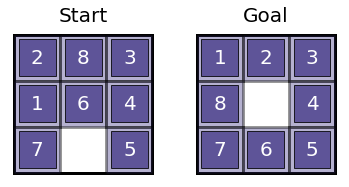

In [2]:
start_state_tiles = [
    2, 8, 3, 
    1, 6, 4, 
    7, 0, 5]

goal_state_tiles = [
    1, 2, 3, 
    8, 0, 4,
    7, 6, 5]

# define start state and goal state
start_state = NPuzzleState(tiles=start_state_tiles)
goal_state = NPuzzleState(tiles=goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start')
goal_state.plot(axes[1], 'Goal')
plt.show()

## Heuristics

In [3]:
def h1(state, goal):
    ''' Number of misplaced tiles heuristic
    '''
    return sum([state.tiles.index(tile) != goal.tiles.index(tile) 
                for tile in range(1, state.N + 1)])



def h2(state, goal):
    ''' Sum of manhatan distance heuristic
    '''
    return sum([manhatan_distance(tile, state, goal)
                for tile in range(1, state.N + 1)])

In [4]:
print(f"h1(start) = {h1(start_state, goal_state)}")
print(f"h2(start) = {h2(start_state, goal_state)}")

h1(start) = 4
h2(start) = 5


### Greedy Search

- Evaluate each generated node in the search tree using:
$$f(n) = h(n)$$
where $h(n)$ is the heuristic function.
- Put the unexpanded nodes in the frontier (which is a priority queue) according to their distance to the goal state.
- At each iteration, the greedy search selects an unexpanded node which appears to be closest to the goal.

<img src='imgs/Best_First.png' width='80%'>

In [5]:
Node = namedtuple('Node', 'state parent action cost')


def greedy_search(start_state, goal_state, heuristic=h1):
    
    num_generated = 0
    frontier = PriorityQueue()
    reached = dict()  # a dictionary of (state, node)

    node = Node(start_state, None, None, 0) 
    frontier.push(node, heuristic(start_state, goal_state))
    reached[start_state] = node

    while not frontier.is_empty():
        # select a node
        node = frontier.pop()
        
        # goal test
        if node.state == goal_state:
            return solution(node), num_generated
        
        # expand
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            path_cost = node.cost + step_cost
            
            if successor not in reached or path_cost < reached[successor].cost:
                child_node = Node(successor, node, action, path_cost)
                reached[successor] = child_node
                frontier.push(child_node, heuristic(successor, goal_state))
        
    return None, num_generated  # no solution found

Perform greedy search using $h_1(n)$ (number of misplaced tiles).

Number of generated nodes: 18


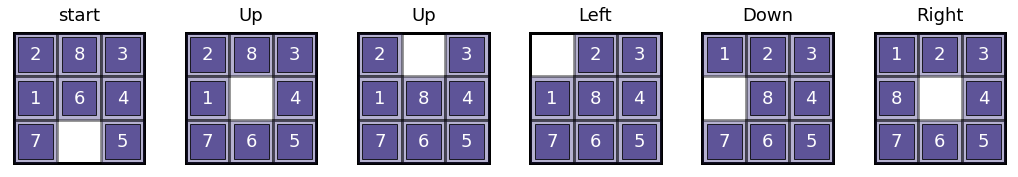

In [6]:
solution_path, N = greedy_search(start_state, goal_state, heuristic=h1)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

Perform greedy search using $h_2(n)$ (total manhattan distance).

Number of generated nodes: 15


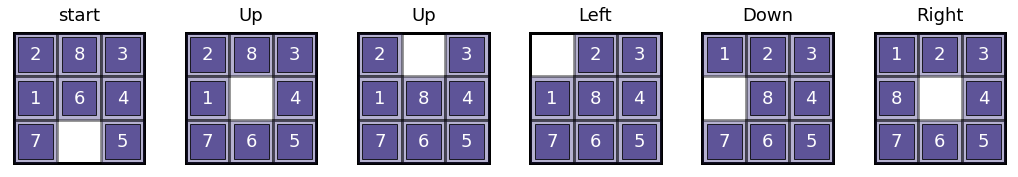

In [7]:
solution_path, N = greedy_search(start_state, goal_state, heuristic=h2)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

### A* Search

- Evaluate each generated node in the search tree using:
$$f(n) = g(n) + h(n)$$
where $g(n)$ is the path cost from root to node $n$ and $h(n)$ is the heuristic function.
- Put the unexpanded nodes in the frontier (which is a priority queue) according to their evaluation $f(n)$.
- At each iteration, the A* search selects an unexpanded node with minimum f-cost.

In [8]:
def a_star_search(start_state, goal_state, heuristic=h1):
    
    num_generated = 0
    frontier = PriorityQueue()
    reached = dict()  # a dictionary of (state, node)

    node = Node(start_state, None, None, 0) 
    frontier.push(node, 0 + heuristic(start_state, goal_state))
    reached[start_state] = node

    while not frontier.is_empty():
        # select a node
        node = frontier.pop()
        
        # goal test
        if node.state == goal_state:
            return solution(node), num_generated
        
        # expand
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            path_cost = node.cost + step_cost
            
            if successor not in reached or path_cost < reached[successor].cost:
                child_node = Node(successor, node, action, path_cost)
                reached[successor] = child_node
                frontier.push(child_node, path_cost + heuristic(successor, goal_state))
        
    return None, num_generated  # no solution found

Perform A* using $h_1(n)$ (number of misplaced tiles).

Number of generated nodes = 18


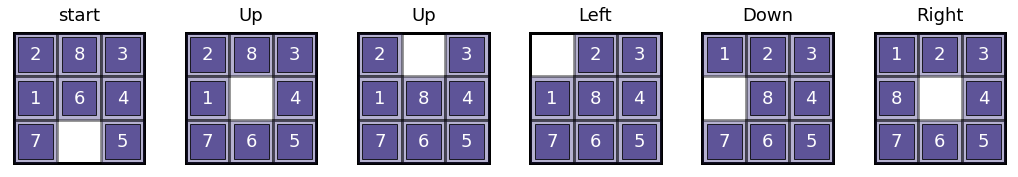

In [9]:
path, num_generated = a_star_search(start_state, goal_state, heuristic=h1)

print(f"Number of generated nodes = {num_generated}")
show_solution(start_state, path, ncols=6)

Perform A* using $h_2(n)$ (total manhattan distance).

Number of generated nodes = 15


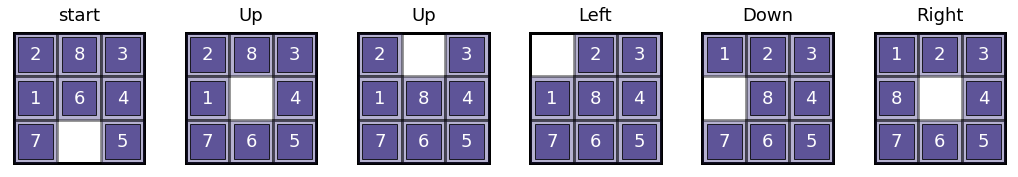

In [10]:
path, num_generated = a_star_search(start_state, goal_state, heuristic=h2)

print(f"Number of generated nodes = {num_generated}")
show_solution(start_state, path, ncols=6)

#### Finding path for a random initial sate

Random initial state:


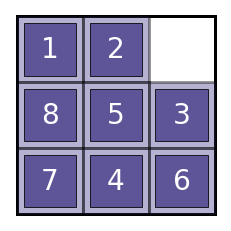

In [11]:
def create_random_initial_state(goal_state, max_steps=50):
    state = NPuzzleState(tiles=goal_state.tiles)
    for i in range(max_steps):
        state = random.choice(state.successors())[0]
    return state


initial_state = create_random_initial_state(goal_state)
print('Random initial state:')
initial_state.plot(fs=28)

Perform A* using $h_2(n)$ (total manhattan distance).

Number of generated nodes: 17


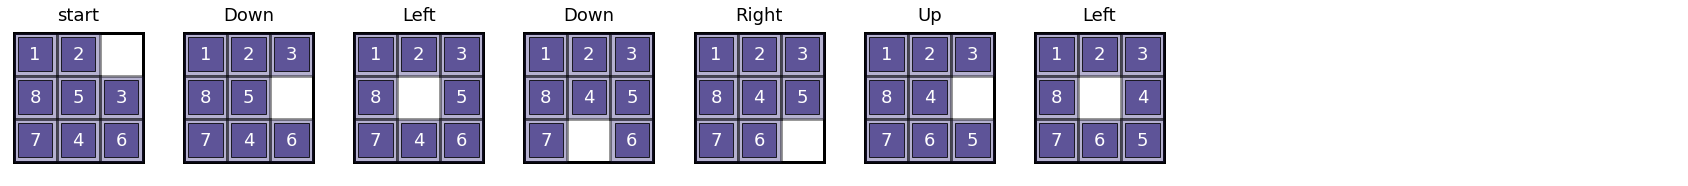

In [12]:
path, N = a_star_search(initial_state, goal_state, heuristic=h2)

print(f"Number of generated nodes: {N}")
show_solution(initial_state, path, ncols=10)

Perform A* using $h_1(n)$ (number of misplaced tiles).

Number of generated nodes: 25


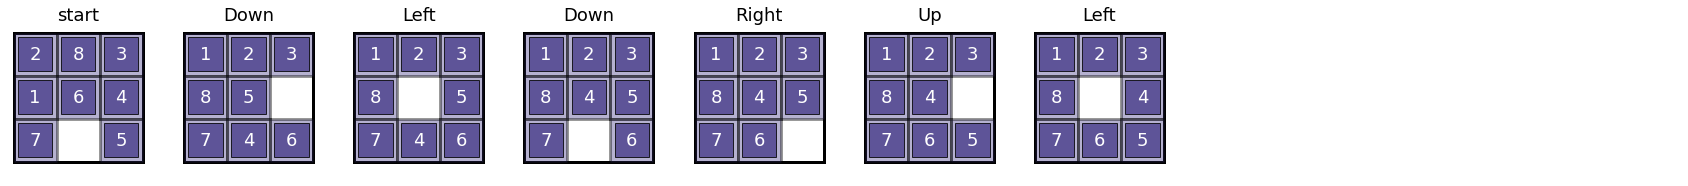

In [13]:
path, N = a_star_search(initial_state, goal_state, heuristic=h1)

print(f"Number of generated nodes: {N}")
show_solution(start_state, path, ncols=10)

Perform A* using $h_2(n)$ (total manhattan distance).

## 15-Puzzle

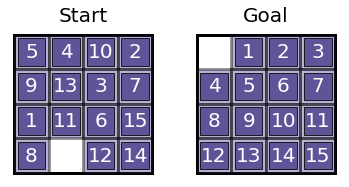

In [14]:
# create goal state and start state
goal_state = NPuzzleState(15)
start_state = create_random_initial_state(goal_state, max_steps=100)

# plot strat state and goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start', fs=20)
goal_state.plot(axes[1], 'Goal', fs=20)

Perform A* using $h_1(n)$ (number of misplaced tiles).

Number of generated nodes: 499285


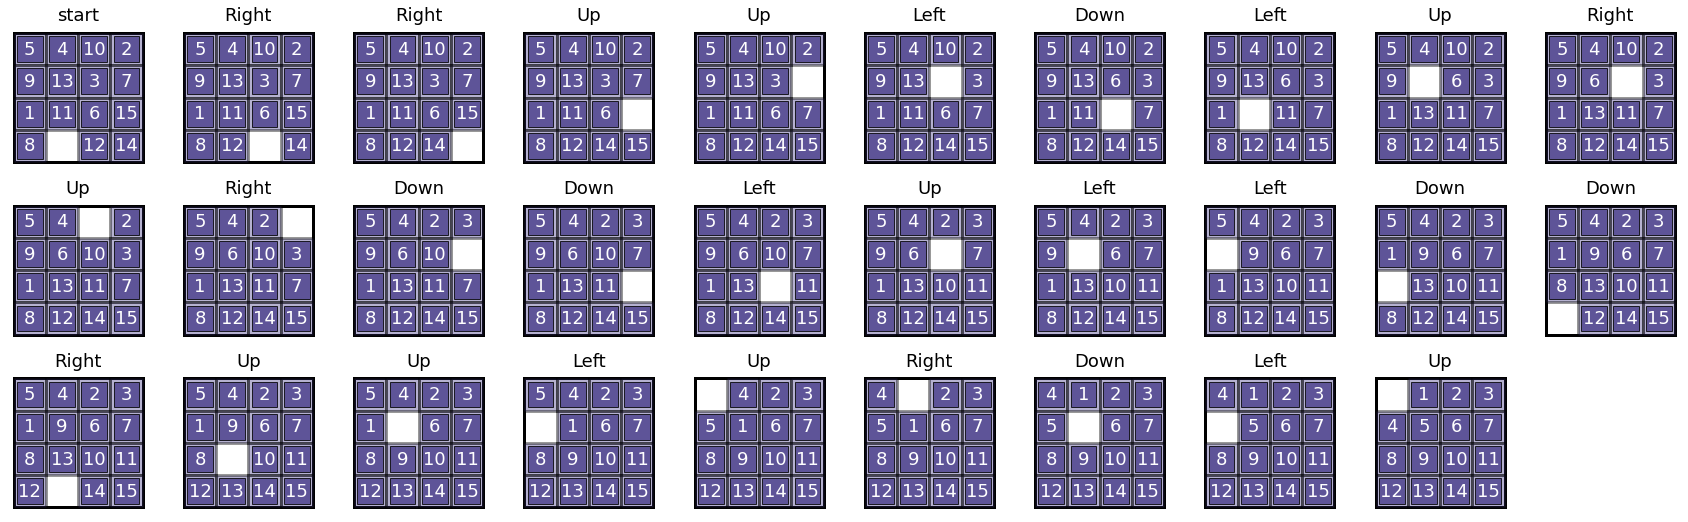

In [15]:
path, N = a_star_search(start_state, goal_state, heuristic=h1)

print(f"Number of generated nodes: {N}")
show_solution(start_state, path, ncols=10)

Perform A* using $h_2(n)$ (total manhattan distance).

Number of generated nodes: 1766


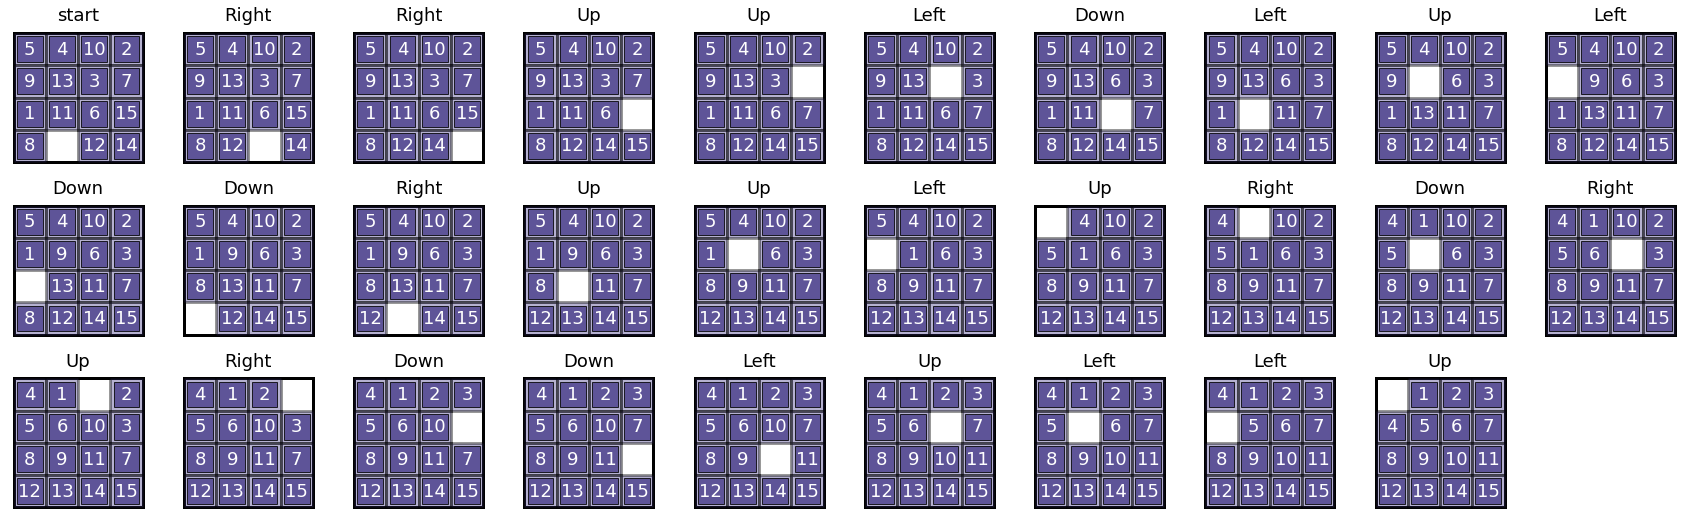

In [16]:
path, N = a_star_search(start_state, goal_state, heuristic=h2)

print(f"Number of generated nodes: {N}")
show_solution(start_state, path, ncols=10)

## 24-Puzzle

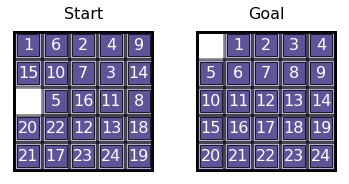

In [17]:
# create goal state and start state
goal_state = NPuzzleState(24)
start_state = create_random_initial_state(goal_state, max_steps=100)

# plot strat state and goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start', fs=16)
goal_state.plot(axes[1], 'Goal', fs=16)

Perform A* using $h_1(n)$ (number of misplaced tiles).

Perform A* using $h_2(n)$ (total manhattan distance).

Number of generated nodes: 426


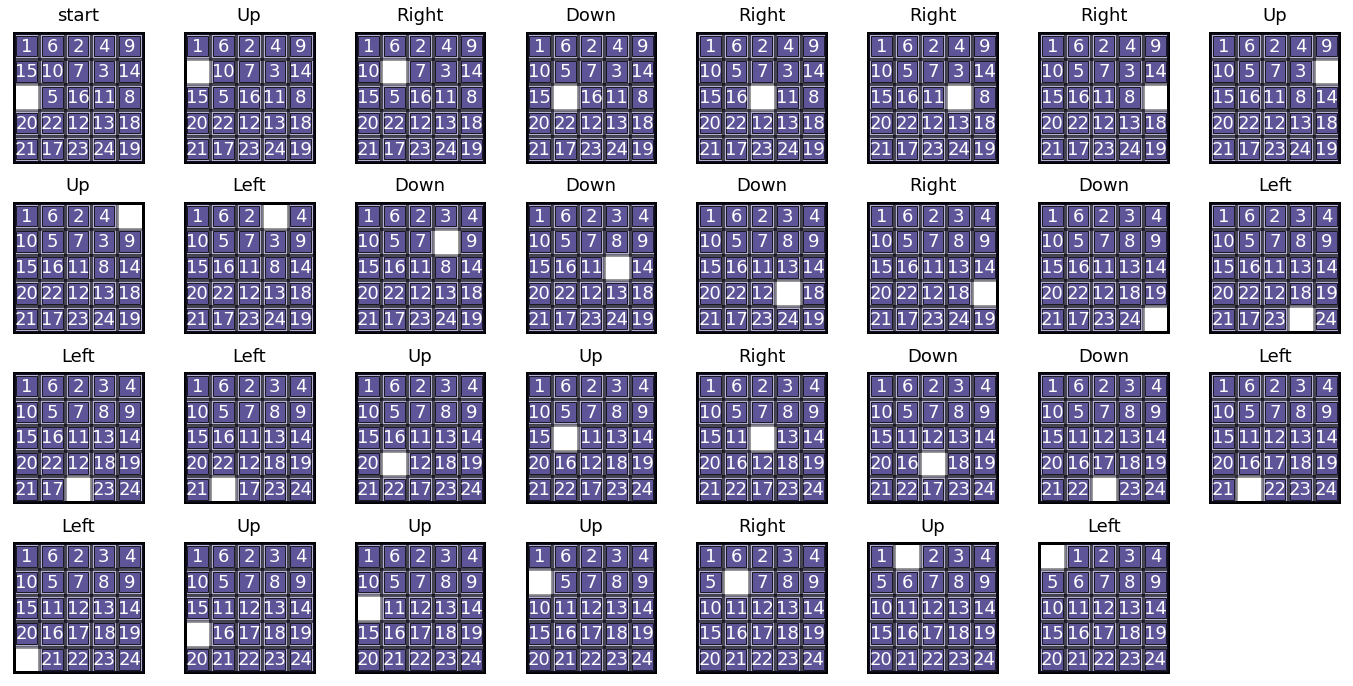

In [18]:
path, N = a_star_search(start_state, goal_state, heuristic=h2)

print(f"Number of generated nodes: {N}")
show_solution(start_state, path, ncols=8)

Number of generated nodes: 28833


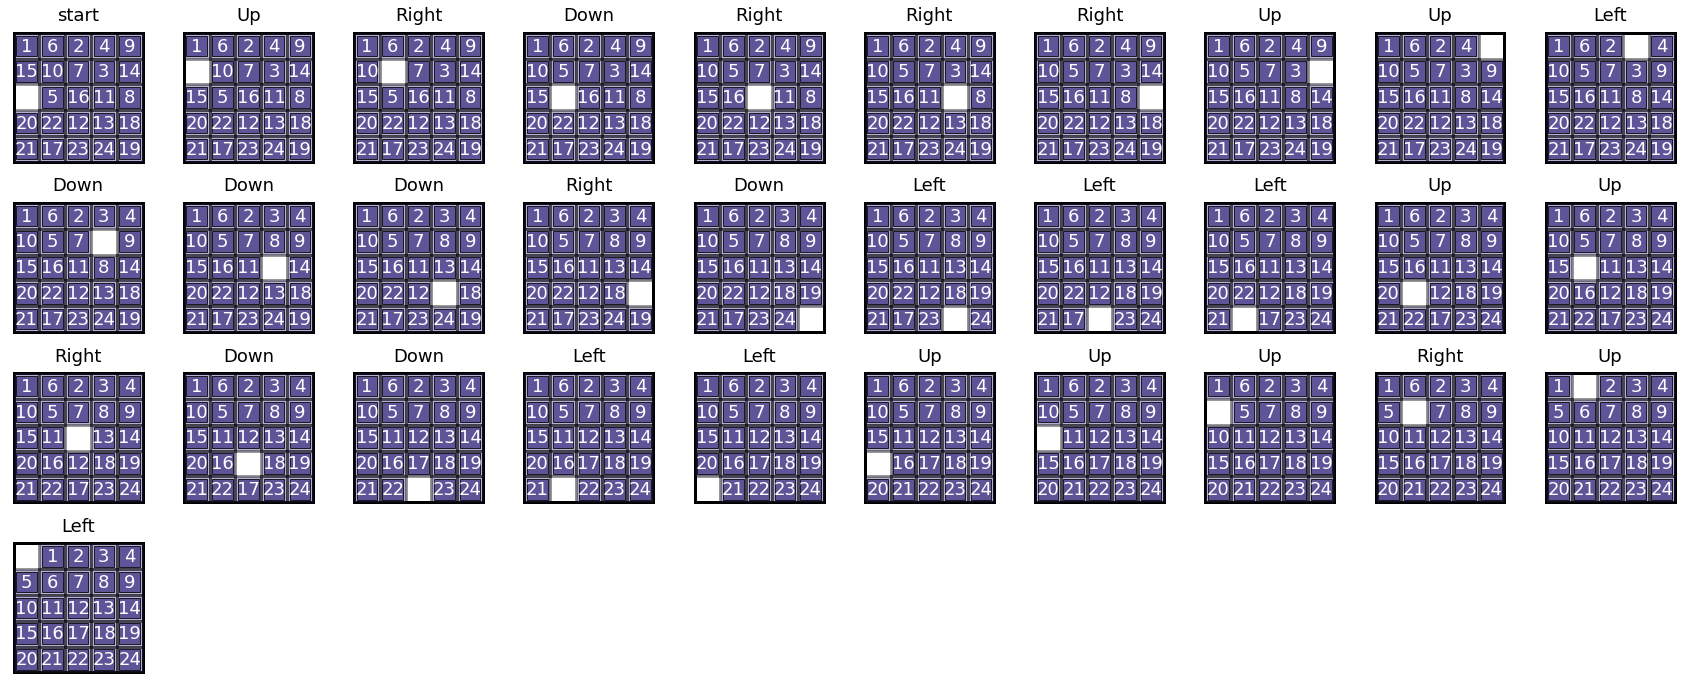

In [19]:
path, N = a_star_search(start_state, goal_state, heuristic=h1)

print(f"Number of generated nodes: {N}")
show_solution(start_state, path, ncols=10)

### Animation

In [20]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')

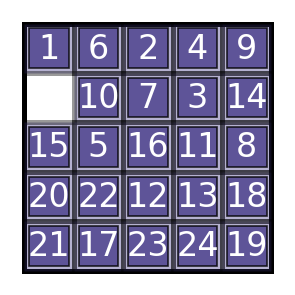

In [25]:
fig = plt.figure(figsize=(3, 3), dpi=120)
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    state = path[i][0]
    state.plot(ax)

anim = FuncAnimation(fig, animate, frames=range(len(path)), interval=500, repeat=True, repeat_delay=2000)


anim.save(f'imgs/25-puzzle.gif', writer='imagemagick')

In [26]:
anim

## What's next?
- So far, we have solved search problems in which the aim was to find a path from initial state to the goal state.
- But in real world, there are many problems in which the goal state in not specified and in fact the aim is to find the goal state itself.
- In the next lesson, we will explore and implement local search algorithms to solve these kinds of problems.